<a href="https://colab.research.google.com/github/Zac-Sells/MLA_ZTS/blob/main/FinalProject_Classification_ZTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports


In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [255]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [256]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

In [257]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree



###Reading data

In [259]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/winequality-white.csv')

In [260]:
quality_scores = df['quality'].groupby(df['quality']).count()

###Desscribing data

In [261]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [262]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [263]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2120,6.8,0.25,0.27,10.70,0.076,47.0,154.0,0.99670,3.05,0.38,9.0,5
4393,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,6
4268,5.7,0.22,0.29,3.50,0.040,27.0,146.0,0.98999,3.17,0.36,12.1,6
2000,6.8,0.31,0.09,1.40,0.040,56.0,145.0,0.99220,3.19,0.46,10.0,5
1160,7.5,0.14,0.34,1.30,0.055,50.0,153.0,0.99450,3.29,0.80,9.6,6


In [264]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [265]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [266]:
quality_scores

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

<Axes: xlabel='quality'>

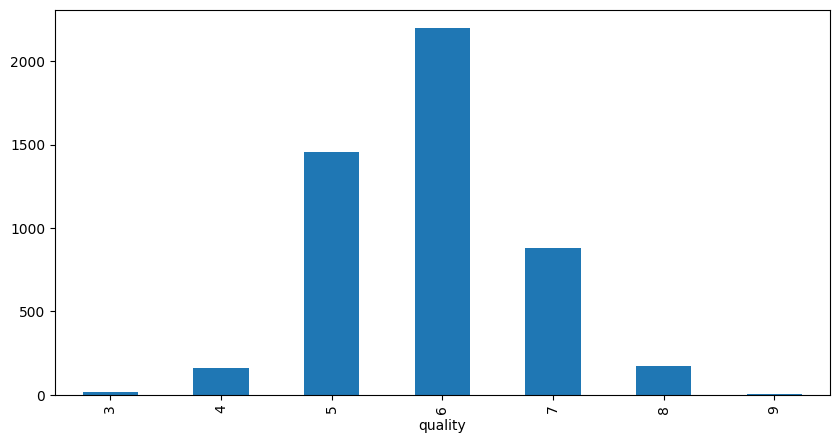

In [267]:
quality_scores.plot(kind='bar',figsize=(10,5))

###Logistic classifier model

In [268]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [269]:
X = (df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])
Y = (df[['quality']])


In [270]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.20, random_state=4)

In [271]:
num_attribs=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [272]:
col_transform=ColumnTransformer(transformers=[('num',MinMaxScaler(),num_attribs)],remainder='passthrough')

In [273]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('mlr', LogisticRegression(max_iter=1000)),
                      ])

In [274]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

In [275]:
y_pred = pipeline.predict(X_test)

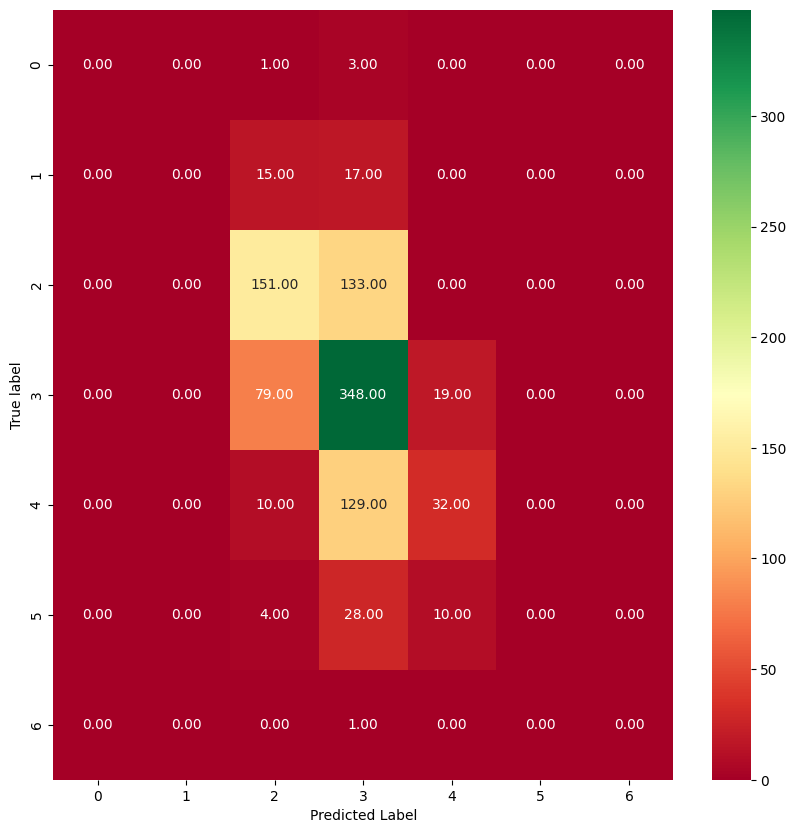

In [276]:
plot_cm(y_test,y_pred)

In [277]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        32
           5       0.58      0.53      0.56       284
           6       0.53      0.78      0.63       446
           7       0.52      0.19      0.28       171
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00         1

    accuracy                           0.54       980
   macro avg       0.23      0.21      0.21       980
weighted avg       0.50      0.54      0.50       980



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Evaluate Logistic regression model


The logisitic classifer model generate precision, recall, f1, and accuracy scores that were far from acceptable. This model does a bad job all the way around of classifing the wines by quality.

#Random Forest Classifier model

In [278]:
X = (df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])
Y = (df[['quality']])


In [279]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.20, random_state=4)

In [280]:
num_attribs=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [281]:
col_transform=ColumnTransformer(transformers=[('num',MinMaxScaler(),num_attribs)],remainder='passthrough')

In [282]:
pipeline = Pipeline([('transform',col_transform),('decision_tree',tree.DecisionTreeClassifier(max_depth=5))])

In [293]:
random_forest= Pipeline([('transform', col_transform),('rf',RandomForestClassifier(n_estimators=1000,max_samples=3918,bootstrap=True,oob_score=True, n_jobs=-1))])

In [294]:
random_forest.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('rf',
                 RandomForestClassifier(max_samples=3918, n_estimators=1000,
                                        n_jobs=-1, oob_score=True))])

In [295]:
y_pred= pipeline.predict(X_test)

In [296]:
random_forest.named_steps.rf.oob_score_

0.6896375701888718

In [297]:
y_pred = random_forest.predict(X_test)


In [298]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.06      0.12        32
           5       0.73      0.72      0.72       284
           6       0.67      0.80      0.73       446
           7       0.66      0.57      0.61       171
           8       0.90      0.43      0.58        42
           9       0.00      0.00      0.00         1

    accuracy                           0.69       980
   macro avg       0.57      0.37      0.40       980
weighted avg       0.70      0.69      0.68       980



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


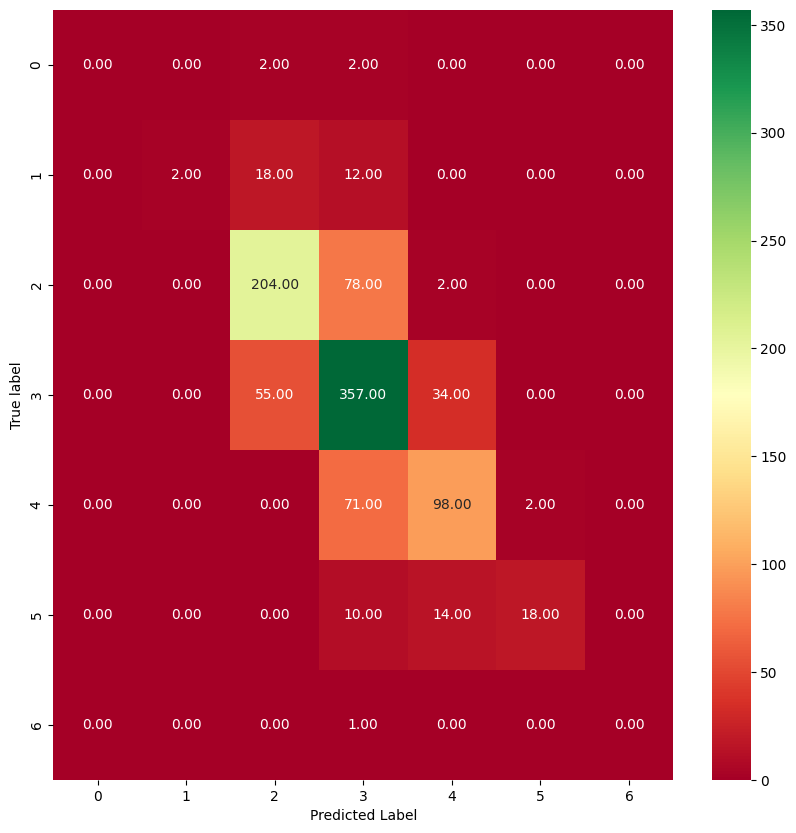

In [299]:
plot_cm(y_test,y_pred)

###Evaluate random forrest model


The randomforrest classifer model generate precision, recall, f1, and accuracy scores that were less than acceptable. This model does not do a very good jobv of classifing the wines by quality.

###Conclusion

Both the logistic and random forrest models do pour jobs of classifying the wine by quality score. The random forrest is an improvement from the logistic model. If you had to use one I would use the random forrest, but I would recommend exploring different options. 